# Ecuaciones Diferenciales Ordinarias

Veremos como resolver sistemas de la forma
$x' = f(t,x)$,
donde $t \in \mathbb{R}$ y $x \in \mathbb{R}^n$ ($n \in \mathbb{N}$).



In [11]:
# Paquetes necesarios
using Pkg
Pkg.activate(".") # Activa el environment local del directorio de trabajo.
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

using DifferentialEquations
using Plots


  Activating project at `/mnt/md1/mmestre/work/cursos/TallerJulia`


   Resolving package versions...


  No Changes to `/mnt/md1/mmestre/work/cursos/TallerJulia/Project.toml`
  No Changes to `/mnt/md1/mmestre/work/cursos/TallerJulia/Manifest.toml`


   Resolving package versions...


  No Changes to `/mnt/md1/mmestre/work/cursos/TallerJulia/Project.toml`
  No Changes to `/mnt/md1/mmestre/work/cursos/TallerJulia/Manifest.toml`


#### Caso $n=1$ con un sólo parametro escalar $p$.

In [8]:
ode(u, p, t) = -p*u
u₀ = 1.0
tspan = (0.0, 1.0)
p = 3.5
prob = ODEProblem(ode, u₀, tspan, p)
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Vector{Float64}:
 0.0
 0.060598182365485836
 0.14676456292061202
 0.247437253121808
 0.3688793860077139
 0.50531529148108
 0.6575466508260734
 0.8221967438151083
 0.9982852330360676
 1.0
u: 10-element Vector{Float64}:
 1.0
 0.8088889587255542
 0.5982922942853544
 0.4206181039222105
 0.27497466145157695
 0.17057171440065283
 0.1001182125398795
 0.05626575318208301
 0.03038023583861846
 0.030198449310263373

#### Ahora lo ploteamos.

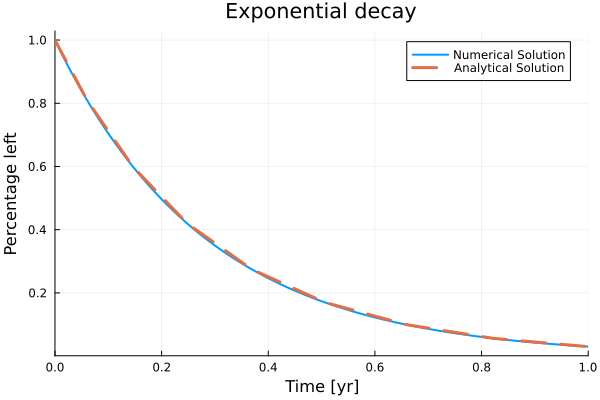

In [12]:
plot(sol, linewidth = 2, title = "Exponential decay",
    xaxis = "Time [yr]", yaxis = "Percentage left",
    label = "Numerical Solution")
plot!(sol.t, t -> exp(-p * t), lw = 3, ls = :dash, label = "Analytical Solution")

### El Pendulo simple.
#### Caso $n=2$ con dos parámetros (que bien podrian reescribirse como uno, pero lo dejo como ejemplo de cuando $p$ es un vector).

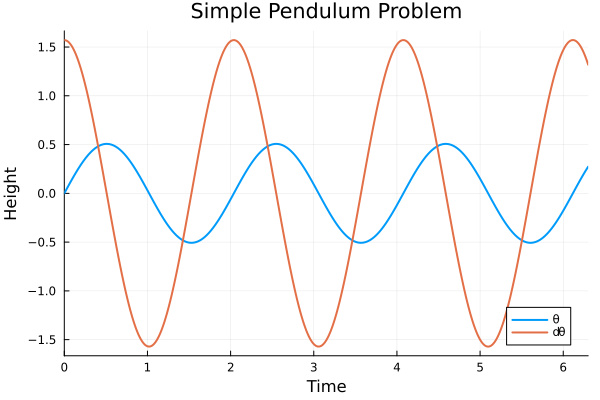

In [17]:
#Constants
const g = 9.81
const L = 1.0
p = [g, L]

#Initial Conditions
u₀ = [0, π / 2]
tspan = (0.0, 6.3)

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(p[1] / p[2]) * sin(θ)
end

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan, p)
sol = solve(prob, Tsit5())

#Plot
plot(sol, linewidth = 2, title = "Simple Pendulum Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])